In [66]:
import pandas as pd
import numpy as np
import json
import plotly.express as px


## Exercise 1

First we load and take a look at the dataset

In [67]:
dessert_data = pd.read_json("data/dessert.json")
dessert_data.drop(["portions", "nutrients"],axis=1,inplace=True)
dessert_data.sample(10)

,id,description,tags,manufacturer,type
351,18563,"ARCHWAY Home Style Cookies, Gourmet Rocky Road",[],Archway Cookies,Cookies
73,18117,"Cake, marble, dry mix, pudding-type",[],,Cake
18,18035,Multi-grain bread with nutella,[],None,Sweet Bread
188,18286,"Muffins, wheat bran, toaster-type with raisins",[],,Muffins
102,18164,"Cookies, chocolate chip, refrigerated dough, b...",[],None,Cookies
390,18953,"Bread, salvadoran sweet cheese (quesadilla sal...",[Latino food],None,Savory Bread
142,18219,"Crackers, matzo, whole-wheat",[],,Savory Bread
371,18651,"NABISCO, NABISCO SNACKWELL'S Fat Free Devil's ...",[],None,Cake
39,18066,"Bread, wheat bran",[],,Savory Bread
346,18549,"ARCHWAY Home Style Cookies, Gourmet Apple'n Ra...",[],Archway Cookies,Cookies


### Exercise 1a)

We decided to replace empty Strings and `None` values with the string "No manufacturer" for the **Manufacturer** column:

In [68]:
dessert_data.replace("", None, inplace=True)
dessert_data.fillna(value="no Manufacturer",inplace=True)
dessert_data["manufacturer"].sample(40)

271    no Manufacturer
204    no Manufacturer
18     no Manufacturer
265    no Manufacturer
268    no Manufacturer
205    no Manufacturer
51     no Manufacturer
103    no Manufacturer
40     no Manufacturer
269    no Manufacturer
108    no Manufacturer
1      no Manufacturer
254    no Manufacturer
195    no Manufacturer
277    no Manufacturer
237    no Manufacturer
59     no Manufacturer
182    no Manufacturer
146    no Manufacturer
127    no Manufacturer
373    no Manufacturer
245    no Manufacturer
178    no Manufacturer
35     no Manufacturer
222    no Manufacturer
287    no Manufacturer
53     no Manufacturer
235    no Manufacturer
49     no Manufacturer
169    no Manufacturer
32     no Manufacturer
291       Kellogg, Co.
179    no Manufacturer
276    no Manufacturer
48     no Manufacturer
99     no Manufacturer
351    Archway Cookies
57     no Manufacturer
232    no Manufacturer
346    Archway Cookies
Name: manufacturer, dtype: object

Next, we need to extract the contents of the lists in the **tags** column. We define a function to print the content of the list and return it:

In [69]:
def print_list(my_list):
    if len(my_list) > 0:
        count = 0
        for x in my_list:
            print(f"list value of element {count}: {x}")
            count += 1
    return my_list
dessert_data["tags"].map(print_list)

list value of element 0: Include commodity code B367
list value of element 0: Include commodity code B368
list value of element 0: Latino food
list value of element 0: Latino food


0                 []
1                 []
2                 []
3                 []
4                 []
           ...      
387               []
388               []
389               []
390    [Latino food]
391    [Latino food]
Name: tags, Length: 392, dtype: object

As you can see, we have only 4 list entries actually containing any tags in the entire column. And for those entries, the list has a length of 1, which means we can use a similiar function to extract the values from the list and return them as a string to the dataframe:

In [70]:
def extract_list_ele(my_list): #returns first content of list if non empty and "no Tags" otherwise
    if type(my_list) == list: # check if we are working on lists
        if len(my_list) == 0:
            return "no Tags"
        else:
            return my_list[0]
    else: #if not list, do nothing
        return my_list

dessert_data["tags"]=dessert_data["tags"].map(extract_list_ele)

dessert_data['tags'].sample(10)

277    no Tags
386    no Tags
299    no Tags
348    no Tags
16     no Tags
288    no Tags
200    no Tags
25     no Tags
362    no Tags
338    no Tags
Name: tags, dtype: object

We need to consolidate different types of spellings in the `type` column:

In [71]:
dessert_data["type"].unique()

array(['Biscuits', 'Sweet Bread', 'Savory Bread', 'Sweet bread',
       'Sweet Breads', 'no Manufacturer', 'Cake', 'Cookies', 'Coookies',
       'Puff Pastry', 'Savory bread', 'Cream Puff', 'Muffins',
       'sweet bread', 'Muffin', 'Toaster Pastries', 'Muesli', 'Biscuit',
       'Cookie'], dtype=object)

In [72]:
dessert_data.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data.replace("Cookies", "Cookie", inplace=True)
dessert_data.replace("Coookies", "Cookie", inplace=True)

dessert_data.replace("Biscuits", "Biscuit", inplace=True)

dessert_data.replace("Muffins", "Muffin", inplace=True)

dessert_data.replace("Savory bread", "Savory Bread", inplace=True)

Furthermore, we are going to flatten the `nutrients` and `portions` columns with `json_normalize()`:

In [73]:
with open("data/dessert.json") as json_file: 
    dessert_json = json.load(json_file)
    
dessert_data_port = pd.json_normalize(dessert_json, record_path=["portions"],meta=["id","type"],meta_prefix="origin-") # flatten json object into separate df
dessert_data_nutr = pd.json_normalize(dessert_json, record_path=["nutrients"],meta=["id","type"], meta_prefix="origin-") # flatten json object into separate df

since we are loading from the json, we need to consolidate `type` again:

In [74]:
dessert_data_nutr.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data_nutr.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data_nutr.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data_nutr.replace("Cookies", "Cookie", inplace=True)
dessert_data_nutr.replace("Coookies", "Cookie", inplace=True)

dessert_data_nutr.replace("Biscuits", "Biscuit", inplace=True)

dessert_data_nutr.replace("Muffins", "Muffin", inplace=True)

dessert_data_nutr.replace("Savory bread", "Savory Bread", inplace=True)



dessert_data_port.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data_port.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data_port.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data_port.replace("Cookies", "Cookie", inplace=True)
dessert_data_port.replace("Coookies", "Cookie", inplace=True)

dessert_data_port.replace("Biscuits", "Biscuit", inplace=True)

dessert_data_port.replace("Muffins", "Muffin", inplace=True)

dessert_data_port.replace("Savory bread", "Savory Bread", inplace=True)

lets look at the nutr table and check it for none types:

In [75]:
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()] #filter out all rows containing a None type val
nutr_none

,value,units,description,type,origin-id,origin-type
8443,0.078,mg,Vitamin B-6,None,18201,Cookie


We only have one single entry which is None, so we can overwrite it manually with the "Vitamin" type:

In [76]:
dessert_data_nutr.at[8443,"type"] = "Vitamins"
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()]
nutr_none #should be empty now

,value,units,description,type,origin-id,origin-type


Next, there is one negative value which we need to set to zero: 

In [77]:
#dessert_data_nutr['value'].describe
dessert_data_nutr[dessert_data_nutr["value"]< 0]

,value,units,description,type,origin-id,origin-type
416,-88.0,mcg,"Folate, total",Vitamins,18017,Biscuit


In [78]:
dessert_data_nutr.at[416, "value"] = 0
dessert_data_nutr[dessert_data_nutr["value"]<0]

,value,units,description,type,origin-id,origin-type


### Exercise 1b)



In [79]:
#get unique dessert types
dessert_data["type"].unique()


array(['Biscuit', 'Sweet Bread', 'Savory Bread', 'no Manufacturer',
       'Cake', 'Cookie', 'Puff Pastry', 'Cream Puff', 'Muffin',
       'Toaster Pastries', 'Muesli'], dtype=object)

<AxesSubplot: >

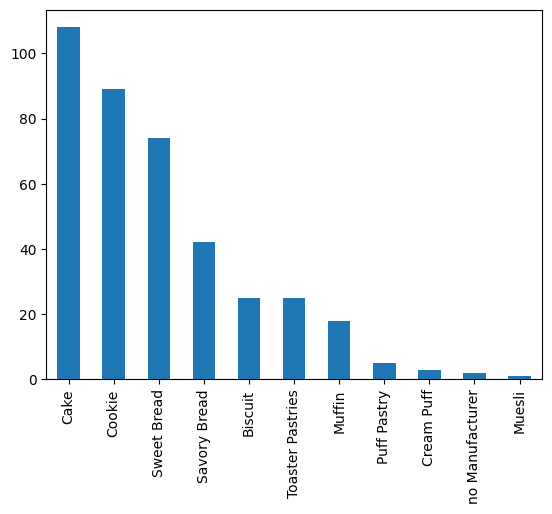

In [80]:
#get dessert type distribution
dessert_data["type"].value_counts().plot.bar()

### Exercise 1 c)

We need to display the median of vitamins by food type. In order to achieve this, we use the `groupby()` method:

In [81]:
nutr_vit = dessert_data_nutr.query('type.str.contains("Vitamins")', engine = 'python') # only keep entries with type Vitamins
nutr_vit.drop("origin-id",axis=1).groupby(["origin-type"]).median(True)

,value
origin-type,
Biscuit,1.075
Cake,0.360
Cookie,0.330
Cream Puff,2.405
Muesli,1.100
Muffin,0.502
Puff Pastry,0.469
Savory Bread,0.387
Sweet Bread,0.331


### Exercise 1 d)

We are tasked with detecting outliers in the amount of available vitamins with a some different methods. We are going to start with a box plot:

In [82]:
fig = px.box(nutr_vit, x = "value",y = "type")
fig

A different approach to spot outliers in a dataset is with a scatter plot. It is quite similar to box plot, but it is usually easier to see outlier data with a scatter plot.

In [110]:
# scatter plot
fig = px.scatter(nutr_vit, y='value', title='Outlier detection with a scatter plot', color='value', color_continuous_scale='thermal')
fig.show()

We can check the distribution of the data to see which statistical approach can be used.

In [111]:
# draw a histogram to check value distribution
fig = px.histogram(nutr_vit['value'], x='value', title='Distribution of the values of Vitamins')
fig.show()

Since the data is not normally distirbuted, we can use the interquartile range (IQR) method instead of using the Z-score. Normally the IQR is used with the 25th and the 75th percentile of a given dataset. Our data seems very spread and so we decided to adjust the percentiles for lower and upper barrier individually.

In [84]:
# find outliers with defined 'barriers' of min and max (in %) and then apply this as a filter on the given dataframe
def find_outliers_IQR(df, min, max):
   q1=df.quantile(min / 100)
   q3=df.quantile(max / 100)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [112]:
# apply function to dataframe and store the outliers
outliers = find_outliers_IQR(nutr_vit['value'], 5, 95)

print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 115
max outlier value: 8020.0
min outlier value: 278.0


18        999.0
464       493.0
604       391.0
1134      304.0
1901      666.0
          ...  
20841     467.0
21395    1429.0
21396     429.0
21397     429.0
21454     584.0
Name: value, Length: 115, dtype: float64